In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_digits 

In [4]:
digits = load_digits()

In [19]:
X, y = digits.data, digits.target

In [60]:
X_new = [] # transformation du grand vecteur 64x1 en une matrice 8x8 et ce pour chaque vecteur de X
for i in range(len(X)):
    X_new.append(X[i].reshape(8,8))

In [98]:
def index_chiffre(n, y):  # elle nous renvoie un tableau contenant les indices représentants le chiffre n
    index = []           # j'ai rajouté le y dans les arguments car je me servirai de cette fonction dans la suite
    for i in range(len(y)):
        if y[i]==n:
            index.append(i)
    return index

In [99]:
def image_moyenne(n, X, y): # cette fonction renvoie la matrice moyenne pour le chiffre n
    index = index_chiffre(n, y) # de même je rajoute l'argument X et y car je m'en servirai dans la suite
    sum_matrice = np.zeros((8,8)) # la matrice qui sera utilisée dans la somme
    for i in index:
        sum_matrice += X[i] # on somme toutes les matrices représentants le chiffre n
    return sum_matrice/len(index)

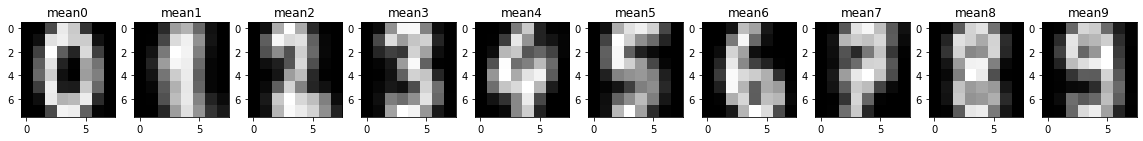

In [100]:
fig, ax = plt.subplots(1,10,figsize=(20,2))
for i in range(10):
    ax[i].imshow(image_moyenne(i, X_new, y), cmap='gray') 
    ax[i].set_title("mean"+str(i))

In [88]:
from sklearn.model_selection import train_test_split

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3) # on divise nos données en deux parties, train et test

In [344]:
centroide_train = []
for i in range(10): # on calcul le centroïde pour chaque chiffre i entre 0 et 9 avec X_train et y_train
    centroide_train.append(image_moyenne(i, X_train, y_train)) 

In [345]:
def norme_eucli_matrice(A): # calcul de la norme euclidienne de la matrice
    return np.trace(A@(A.transpose()))**(1/2)

In [346]:
def centroide_proche(X, n): # ici n représente l'indice de X qui nous intéresse
    minimum = norme_eucli_matrice(X[n]-centroide_train[0]) # on suppose que la plus petite valeur de différence est atteinte pour le centroide_train 0
    j = 0 # l'indice qui nous permettra de savoir quel case de centroide_train notre X_n représente
    for i in range(10): 
        if norme_eucli_matrice(X[n]-centroide_train[i]) < minimum:
            minimum = norme_eucli_matrice(X[n]-centroide_train[i])
            j=i # lorsqu'on a trouvé ce minimum on enregistre à quelle case il est atteint
    return j    

In [347]:
y_pred = [] # on crée une liste contenant les "prédictions" pour chaque case de X_test
for n in range(len(X_test)): 
    y_pred.append(centroide_proche(X_test, n))

In [348]:
j = 0 # pour avoir une estimation brute du pourcentage on va calculer le nombre de fois où y_pred=y_test et on divise sur le nombre total
for i in range(len(y_pred)):
    if y_pred[i]==y_test[i]:
        j+=1
print("Le pourcentage de prédiction sur l'ensemble de test est "+str(j/len(y_pred)*100))

Le pourcentage de prédiction sur l'ensemble de test est 91.85185185185185
